In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import os
from scipy.io import arff
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler 
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.impute import SimpleImputer
from sklearn.svm import SVC
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from keras.models import Sequential
from keras.layers import Dense
import tensorflow as tf
from tensorflow import keras
import keras_tuner as kt
from kerastuner.engine.hyperparameters import HyperParameters
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score, roc_curve

In [71]:
# Load the data
data = pd.read_csv("/Users/raviensrivarathan/Desktop/xgboost_flask_appy/churn.csv")
data

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [72]:
data.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

### Gender Distribution and Attrition by bar chart 

In [73]:
# Gender Distribution Bar Chart
gender_counts = data['Gender'].value_counts().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.bar(gender_counts, x='Gender', y='Count', color='Gender', title="Gender Distribution")
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Count")
fig.show()

# Customer Attrition by Gender Bar Chart
gender_attrition = data.groupby("Gender")["Exited"].mean().reset_index()
gender_attrition.columns = ['Gender', 'Attrition Rate']
category_order = ['Male', 'Female']

fig = px.bar(gender_attrition, x='Gender', y='Attrition Rate', color='Gender',
        title="Customer Attrition by Gender", category_orders={"Gender": category_order})
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Attrition Rate")
fig.show()

 .

Number of people who have churned: 2037

1 - So, the resulting bar chart will show you the distribution of gender in the dataset by displaying the count of male and female customers. 

2 - bar chart to compare customer attrition rates between male and female customers.

.

### Country Distribution & Attrition

In [74]:
# Country Distribution Bar Chart
country_counts = data['Geography'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

fig = px.bar(country_counts, x='Country', y='Count', color='Country', title="Country Distribution")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Count")
fig.show()

# Customer Attrition by Country Bar Chart
country_attrition = data.groupby("Geography")["Exited"].mean().reset_index()
country_attrition.columns = ['Country', 'Attrition Rate']

fig = px.bar(country_attrition, x='Country', y='Attrition Rate', color='Country',
            title="Customer Attrition by Country")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Attrition Rate")
fig.show()

# Churn Counts by Country Bar Chart
country_churn_counts = data[data['Exited'] == 1].groupby("Geography")["Exited"].count().reset_index()
country_churn_counts.columns = ['Country', 'Churn Count']

fig = px.bar(country_churn_counts, x='Country', y='Churn Count', color='Country',
            title="Churn Counts by Country")
fig.update_xaxes(title="Country")
fig.update_yaxes(title="Churn Count")
fig.show()

# Churn Distribution Histogram
fig = px.histogram(data, x='Exited', color_discrete_sequence=['skyblue'], title="Churn Distribution")
fig.update_xaxes(title="Churned (Exited = 1)")
fig.update_yaxes(title="Frequency")
fig.update_xaxes(tickvals=[0, 1], ticktext=['Not Churned', 'Churned'])
fig.show()

Churn Counts by Country:
Geography
France     810
Germany    814
Spain      413
Name: Exited, dtype: int64

In the graph, the attrition rate is calculated by dividing the number of churned customers by the total number of customers for each country, which gives you a relative view of attrition. It may appear that Germany has a higher attrition rate because of this relative calculation.
In the counts, you directly see the number of customers who have churned from each country, and in this case, the counts show that Germany and France have a similar number of churned customers.

It's essential to consider both perspectives: the attrition rate provides insights into the relative impact of churn within each country, while the counts give you the actual number of customers affected.

.

### Look at the trends of Gender Distribution and Attrition

In [75]:

gender_counts = data['Gender'].value_counts().sort_index().reset_index()
gender_counts.columns = ['Gender', 'Count']

fig = px.line(gender_counts, x='Gender', y='Count', title="Trend of Gender Distribution")
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Count")
fig.show()

In [76]:
# Group the data by Gender and calculate the attrition rate for each group
gender_attrition = (data.groupby("Gender")["Exited"].mean() * 100).reset_index()
gender_attrition.columns = ['Gender', 'Attrition Rate (%)']

# Create an interactive line plot
fig = px.line(gender_attrition, x='Gender', y='Attrition Rate (%)', title="Customer Attrition by Gender")
fig.update_xaxes(title="Gender")
fig.update_yaxes(title="Attrition Rate (%)")
fig.show()

# Group the data by Gender and calculate the percentage of customers who have churned for each group
gender_churn_percentage = (data.groupby("Gender")["Exited"].sum() / data.groupby("Gender")["Exited"].count()) * 100

# Display the percentage of customers who have churned by gender
print("Percentage of Customers Churned by Gender:")
print(gender_churn_percentage)

Percentage of Customers Churned by Gender:
Gender
Female    25.071539
Male      16.455928
Name: Exited, dtype: float64


.

### Revenue Impact 

In [77]:

churned_customers = data[data['Exited'] == 1]
retained_customers = data[data['Exited'] == 0]

total_balance_churned = churned_customers['Balance'].sum()
total_balance_retained = retained_customers['Balance'].sum()

revenue_loss = total_balance_churned

revenue_df = pd.DataFrame({'Customer Status': ['Churned Customers', 'Retained Customers'],
                        'Total Balance': [total_balance_churned, total_balance_retained]})

# Plot
fig = px.bar(revenue_df, x='Customer Status', y='Total Balance', color='Customer Status',
            text='Total Balance', title="Revenue Impact of Churned vs. Retained Customers")
fig.update_xaxes(title="Customer Status")
fig.update_yaxes(title="Total Balance")
fig.update_traces(texttemplate='%{text:.2s}', textposition='outside')
fig.show()

print("Revenue Loss due to Churned Customers: ${:.2f}".format(revenue_loss))



Revenue Loss due to Churned Customers: $185588094.63


In [78]:
# average balance for churned and retained customers
average_balance_churned = data[data['Exited'] == 1]['Balance'].mean()
average_balance_retained = data[data['Exited'] == 0]['Balance'].mean()

fig = px.bar(
    x=['Churned Customers', 'Retained Customers'],
    y=[average_balance_churned, average_balance_retained],
    color=['skyblue', 'lightgreen'],
    labels={'x': 'Customer Status', 'y': 'Average Balance'},
    title="Average Balance of Churned vs. Retained Customers"
)
fig.show()

Average Balance of Churned Customers: $91108.54
Average Balance of Retained Customers: $72745.30

churned customers had a higher average balance compared to retained customers. Analyzing such financial metrics can provide insights into the financial impact of customer churn on a business, as well as help identify patterns or trends related to customer behavior and attrition.


The average balance of churned customers is calculated by taking the mean of the 'Balance' column for customers who have churned (Exited = 1).
The average balance of retained customers is calculated by taking the mean of the 'Balance' column for customers who have been retained (Exited = 0)


The average balance represents the "typical" balance of customers in each group, but it doesn't account for the variation in individual balances. It's possible to have a few customers with very high balances in the churned group, which would contribute to the total balance of churned customers being higher than the average balance.

In contrast, the total balance of churned customers sums up all individual balances in that group, regardless of whether they are above or below the average.

So, the two metrics serve different purposes:

Average Balance: Gives you a sense of the typical balance of customers in each group.
Total Balance: Represents the cumulative balance of all customers in each group.



.


### Feature Engineering (Data Preprocessing)

In [79]:

# Feature 1: age categories
data['AgeCategory'] = pd.cut(data['Age'], bins=[0, 30, 50, 100], labels=['Young', 'Adult', 'Senior'])

# Feature 2: balance-to-salary ratio
data['BalanceSalaryRatio'] = data['Balance'] / data['EstimatedSalary']

# Feature 3: tenure-to-age ratio
data['TenureAgeRatio'] = data['Tenure'] / data['Age']

# Feature 4: Encode categorical variables (Geography and Gender) using one-hot encoding
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

# Drop unnecessary columns
data = data.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,AgeCategory,BalanceSalaryRatio,TenureAgeRatio,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,Adult,0.000000,0.047619,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,Adult,0.744677,0.024390,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,Adult,1.401375,0.190476,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,Adult,0.000000,0.025641,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,Adult,1.587055,0.046512,0,1,0


In [80]:
df_correlation = data.corr()
df_correlation.sample(3)

/var/folders/c6/49p8q12j5vq333nfrnpbtz000000gn/T/ipykernel_3412/2228625200.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureAgeRatio,Geography_Germany,Geography_Spain,Gender_Male
Gender_Male,-0.002857,-0.027544,0.014733,0.012087,-0.021859,0.005766,0.022544,-0.008112,-0.106512,0.008384,0.022781,-0.024628,0.016889,1.000000
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000,0.025558,-0.121641,0.173488,-0.052667,-0.106512
Geography_Spain,0.004780,-0.001685,0.003868,-0.134892,0.009039,-0.013480,0.016732,-0.006482,-0.052667,-0.011038,0.011989,-0.332084,1.000000,0.016889


### Heat Map

In [81]:
mask = np.triu(np.ones_like(df_correlation, dtype=bool))

trace = go.Heatmap(z=df_correlation.values, x=df_correlation.columns, y=df_correlation.columns,
                colorscale='RdBu', zmin=-1, zmax=1)


layout = go.Layout(title="Correlation Heatmap", xaxis=dict(side="top"), width=800, height=600, xaxis_showgrid=False, yaxis_showgrid=False)


fig = go.Figure(data=[trace], layout=layout)

fig.show()

**ENCODING AND TEST,TRAIN SPLITTING**

**Setting X variables/parameters and y dependent variable( value to be predicted)**

In [82]:
# Exclude the 'Exited' column as well as redundant columns 
X = data.drop(columns=['Exited','BalanceSalaryRatio', 'TenureAgeRatio','AgeCategory']) 

y = data['Exited']

# Split the data training/testing 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [83]:
# checking to see what my data looks like and if any missing values
print(X.isna().sum())
X

CreditScore          0
Age                  0
Tenure               0
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Geography_Germany    0
Geography_Spain      0
Gender_Male          0
dtype: int64


,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,1
9997,709,36,7,0.00,1,0,1,42085.58,0,0,0
9998,772,42,3,75075.31,2,1,0,92888.52,1,0,1


In [84]:
#CHECKING data types
X.dtypes

CreditScore            int64
Age                    int64
Tenure                 int64
Balance              float64
NumOfProducts          int64
HasCrCard              int64
IsActiveMember         int64
EstimatedSalary      float64
Geography_Germany      uint8
Geography_Spain        uint8
Gender_Male            uint8
dtype: object

.

In [85]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = pd.DataFrame(scaler.transform(X_train), columns = X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns = X_train.columns)

In [86]:
X_train_scaled.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6756,0.252722,2.386532,-0.348369,0.654084,-0.916688,0.649203,0.974817,-0.161380,-0.579467,1.734942,-1.094993
657,-0.017099,2.006242,1.039728,-1.218471,0.808436,0.649203,0.974817,0.043371,-0.579467,-0.576388,0.913248
6867,-1.885090,-1.321293,1.039728,0.830521,0.808436,0.649203,0.974817,1.440104,-0.579467,-0.576388,-1.094993
1386,1.456539,2.956967,-0.695393,-1.218471,0.808436,0.649203,0.974817,1.248519,-0.579467,-0.576388,-1.094993
1166,-1.615269,-0.655786,-0.348369,0.828468,-0.916688,0.649203,-1.025834,-0.590488,-0.579467,-0.576388,0.913248


In [87]:
X_train.sample(5)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
2177,667,24,4,0.00,2,0,1,34335.55,0,0,0
7948,705,25,3,113736.27,1,0,1,196864.61,0,0,1
8223,483,27,1,77805.66,1,1,1,2101.89,0,0,1
1181,651,24,7,40224.70,1,1,1,178341.33,1,0,0
8565,632,40,9,139625.34,1,1,0,93702.96,0,0,0


## MODEL 1 - RANDOM FOREST 
**With Parameters:**

1. Bootstrap ( resampling of the data into smaller samples ), 
2. max_depth ( controls the maximum depth of the individual decision trees in the Random Forest), 
3. Max_features (maximum number of features that can be considered when splitting a node in a decision tree)
4. n_estimators ( determines how many decision trees are included in the forest, which affects the overall model's complexity and robustness.)

In [88]:
parameters = {
    'bootstrap': [True],
    'max_depth': [10,11,12,13],
    'max_features': [10,11,12,13,14],
    'n_estimators': [400,500,600,700]
}

random_forest = RandomForestClassifier()

rf_model = GridSearchCV(random_forest,parameters, cv = 5, n_jobs = -1)
rf_model.fit(X_train_scaled,y_train)
print(rf_model.best_estimator_)

RandomForestClassifier(max_depth=10, max_features=10, n_estimators=400)


<bound method BaseSearchCV.predict of GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [10, 11, 12, 13],
                         'max_features': [10, 11, 12, 13, 14],
                         'n_estimators': [400, 500, 600, 700]})>

## Evaluating model 1

In [89]:
# Make predictions on the test data
y_pred1 = rf_model.predict(X_test_scaled)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred1)
conf_matrix = confusion_matrix(y_test, y_pred1)
class_report = classification_report(y_test, y_pred1)


print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.861
Confusion Matrix:
 [[1538   69]
 [ 209  184]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.80      0.71      0.74      2000
weighted avg       0.85      0.86      0.85      2000



**Overall, the model has a higher accuracy and precision for class 0 (customers who didn't leave) than for class 1 (customers who left). However, the recall for class 1 is relatively lower, indicating that there might be room for improvement in capturing more customers who are actually leaving the bank.**

### Model 2 - Grandient Boosting XGBoost (Extreme Gradient Boosting)

In [90]:
import xgboost as xgb
# Initializing classifier with hyperparameters
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,  
    max_depth=5,  
    random_state=42  
)
gb_model = xgb_classifier.fit(X_train_scaled, y_train)
y_pred2 = gb_model.predict(X_test_scaled)

print("Accuracy:",accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred2))
print("Classification Report:\n",classification_report(y_test, y_pred2))

Accuracy: 0.8645
Confusion Matrix:
 [[1537   70]
 [ 201  192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [115]:
gb_model.predict

<bound method XGBClassifier.predict of XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=42, ...)>

Both models achieved similar accuracy, precision, recall, and F1-score on the test data.
The Random Forest Classifier achieved an accuracy of 0.863, while the XGBoost Classifier achieved an accuracy of 0.8645.
The confusion matrices and classification reports provide more detailed information about the model's performance in terms of true positives, true negatives, false positives, and false negatives.

### Model '3' Another gradient boosting model trying to implement gridsearch and additional parameters this time! 

In [91]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

#defining hyperparameters 

param_grid2 = {
    'bootstrap': [True],
    'n_estimators': [500,600,700],  
    'learning_rate': [0.01, 0.1, 0.2],  
    'max_features': [10, 11, 12],
    'max_depth': [5,6,7], 
    'random_state': [42],
}

xgb_classifier2 = xgb.XGBClassifier()

gb_model2 = GridSearchCV(xgb_classifier2, param_grid2, cv = 5, n_jobs = -1)
gb_model2 = gb_model2.fit(X_train_scaled, y_train)

# 
y_pred3 = gb_model2.predict(X_test_scaled)

# Evaluate
print("Accuracy:",accuracy_score(y_test, y_pred3))
print("Confusion Matrix:\n",confusion_matrix(y_test, y_pred3))
print("Classification Report:\n",classification_report(y_test, y_pred3))

[01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[01:15:41] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-11.0-arm64-cpython-38/xgboost/src/learner.cc:767: 
Parameters: { "bootstrap", "max_features" } are not used.

[01:15:41]

In [107]:
X_train_scaled

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,0.356500,-0.655786,0.345680,-1.218471,0.808436,0.649203,0.974817,1.367670,-0.579467,-0.576388,0.913248
1,-0.203898,0.294938,-0.348369,0.696838,0.808436,0.649203,0.974817,1.661254,1.725723,-0.576388,0.913248
2,-0.961472,-1.416365,-0.695393,0.618629,-0.916688,0.649203,-1.025834,-0.252807,-0.579467,1.734942,0.913248
3,-0.940717,-1.131148,1.386753,0.953212,-0.916688,0.649203,-1.025834,0.915393,-0.579467,-0.576388,-1.094993
4,-1.397337,1.625953,1.386753,1.057449,-0.916688,-1.540351,-1.025834,-1.059600,-0.579467,-0.576388,0.913248
...,...,...,...,...,...,...,...,...,...,...,...
7995,1.207474,1.435808,1.039728,-0.102301,-0.916688,0.649203,0.974817,-0.539860,-0.579467,-0.576388,0.913248
7996,0.314989,1.816097,-1.389442,-1.218471,-0.916688,0.649203,0.974817,-1.733882,-0.579467,-0.576388,-1.094993
7997,0.865009,-0.085351,-1.389442,-1.218471,2.533560,-1.540351,-1.025834,-0.142765,-0.579467,-0.576388,-1.094993
7998,0.159323,0.390011,1.039728,1.827259,-0.916688,0.649203,-1.025834,-0.050826,-0.579467,-0.576388,0.913248


Accuracy: 0.8645
Confusion Matrix:
 [[1548   59]
 [ 212  181]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000

### MODEL 4 - SVM

In [111]:
# Initialize the SVM classifier
svm_classifier = SVC(kernel = 'linear', C=1.0, random_state=42) # You can choose different kernel
# train che svm cassitier on che trainina data
svm_model = svm_classifier.fit(X_train_scaled, y_train)

# Make predictions on the test
y_pred4 = svm_classifier.predict (X_test)

print ("Accuracy:", accuracy_score(y_test, y_pred4))
print ("Confusion Matrix:/n",confusion_matrix(y_test, y_pred4))
print ("Classification Report: \n",classification_report (y_test,
y_pred4))

Accuracy: 0.7435
Confusion Matrix:/n [[1463  144]
 [ 369   24]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1607
           1       0.14      0.06      0.09       393

    accuracy                           0.74      2000
   macro avg       0.47      0.49      0.47      2000
weighted avg       0.67      0.74      0.70      2000



#### Poly

Accuracy: 0.555
Confusion Matrix:/n 
[[1018  589]
 [ 301   92]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.63      0.70      1607
           1       0.14      0.23      0.17       393

    accuracy                           0.56      2000
   
   macro avg       0.45      0.43      0.43      2000

weighted avg       0.65      0.56      0.59      2000 


#### RBF 
Accuracy: 0.1965
Confusion Matrix:/n [[   0 1607]
 [   0  393]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00      1607
           1       0.20      1.00      0.33       393

    accuracy                           0.20      2000
   
   macro avg       0.10      0.50      0.16      2000

weighted avg       0.04      0.20      0.06      2000

### Model 5 - SVM Tuning 

In [ ]:
# initialize an SVM Classifier
svm_classfier = SVC()

# Define a parameter grid for hyperparameter tuning
param_grid = {
    'C': [0.1, 1, 10], # Regularization Parameter
    'kernel' : ['linear', 'rbf', 'poly'], # kernel type
    'gamma' : ['scale', 'auto', 0.1, 1], # Kernel coefficient
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=svm_classfier, param_grid=param_grid, scoring='accuracy')

sva_model5 = grid_search.fit(X_train_scaled, y_train)

best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

#mean cross-validated accuracy of the best estimator 
mean_accuracy = grid_search.best_score_
print(f'Mean Cross-Validated Accuracy: {mean_accuracy: .3f}')

y_pred5 = svm_classifier.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred5))
print("Confusion Matrix;\n", confusion_matrix(y_test, y_pred5))
print("classification Report:\n", classification_report(y_test, y_pred5))

Best Hyperparameters:
{'C': 10, 'gamma': 0.1, 'kernel': 'poly'}
Mean Cross-Validated Accuracy:  0.858
Accuracy: 0.7435
Confusion Matrix;
 [[1463  144]
 [ 369   24]]
classification Report:
               precision    recall  f1-score   support

           0       0.80      0.91      0.85      1607
           1       0.14      0.06      0.09       393

    accuracy                           0.74      2000
   macro avg       0.47      0.49      0.47      2000
weighted avg       0.67      0.74      0.70      2000



#### The Best Hyperparameters:
'C': 10: The best regularization parameter (C) for the SVM model is 10. This parameter controls the trade-off between maximizing the margin and minimizing the classification error. A larger C values indicates a smaller margin but potentially better classification of training points.
'gamma': 0.1: The best value for the kernel coefficient (gamma) is 0.1. Gamma defines how far the influence of a single training example reaches, with lower values meaning "far" and higher values meaning "close."
'kernel': 'poly': The best kernel function to use is the polynomial kernel. This kernel function is used to transform the input features into a higher-dimensional space, which can help capture complex patterns in the data.

#### Mean Cross-Validated Accuracy:
The mean cross-validated accuracy of my model with the best hyperparameters is approximately 85.8%. This means that, on average, my model correctly classifies about 85.8% of the data points in the training data when evaluated using 5-fold cross-validation. Cross-validation helps estimate how well my model generalizes to unseen data.

#### Accuracy
When you applied my trained model to the test data, it achieved an accuracy of 74.35%. This means that it correctly classified about 74.35% of the samples in my test set.

#### Confusion Matrix 
The confusion matrix provides detailed information about the performance of my model, showing the counts of true positives, true negatives, false positives, and false negatives. In my case:
True Positives (TP): 24
True Negatives (TN): 1463
False Positives (FP): 144
False Negatives (FN): 369
This information is essential for understanding how well my model performs in differentiating between the two classes (0 and 1).

#### Classification Report 
The classification report provides various metrics for each class (0 and 1) and their weighted average, including precision, recall, and F1-score.
Precision: The proportion of true positive predictions out of all positive predictions. For class 1, it's quite low at 0.14, indicating a high rate of false positives.
Recall: The proportion of true positive predictions out of all actual positives. For class 1, it's also low at 0.06, indicating a high rate of false negatives.
F1-score: The harmonic mean of precision and recall. It provides a balance between precision and recall, but for class 1, it's low at 0.09.
Support: The number of samples in each class. 



                                                                                            . 

### Model 6 - KNN Model

In [ ]:
# k-NN classifier
k = 3 
knn_classifier = KNeighborsClassifier(n_neighbors=k)

knn_model = knn_classifier.fit(X_train_scaled, y_train)

y_pred6 = knn_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred6))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred6))
print("Classification Report:\n", classification_report(y_test, y_pred6))

Accuracy: 0.832
Confusion Matrix:
 [[1496  111]
 [ 225  168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.60      0.43      0.50       393

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



### Model 7 - KNN Model Tuning 

In [ ]:
# Define a parameter grid for hyperparameter tuning
param_grid = {
    'n_neighbors': [3, 5, 7, 9],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2], 
}

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=knn_classifier, param_grid=param_grid, scoring='accuracy', cv=cv)

# cross-validation and hyperparameter tuning
knn_model2 = grid_search.fit(X_train_scaled, y_train)

# Get the best hyperparameters and estimator from the grid search
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Hyperparameters:")
print(best_params)

# mean cross-validated accuracy
mean_accuracy = grid_search.best_score_
print(f'Mean Cross-Validated Accuracy: {mean_accuracy:.3f}')

y_pred7 = knn_model.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred7))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred7))
print("Classification Report:\n", classification_report(y_test, y_pred7))

Best Hyperparameters:
{'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Mean Cross-Validated Accuracy: 0.832
Accuracy: 0.832
Confusion Matrix:
 [[1496  111]
 [ 225  168]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.93      0.90      1607
           1       0.60      0.43      0.50       393

    accuracy                           0.83      2000
   macro avg       0.74      0.68      0.70      2000
weighted avg       0.82      0.83      0.82      2000



## Model 8 - Neural Network

In [ ]:
# Create a neural network model
model = Sequential()

# Add input layer with the number of input features (X_train.shape[1])
model.add(Dense(units=64, activation='relu', input_dim=X_train_scaled.shape[1]))

# Add hidden layers (you can experiment with the number of layers and units)
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=16, activation='relu'))

model.add(Dense(units=1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


model.fit(X_train_scaled, y_train, epochs=10, batch_size=32, verbose=2)

# Evaluate the model on the test data
y_pred8 = model.predict(X_test_scaled)
loss, accuracy = model.evaluate(X_test_scaled, y_test)  # Use X_test_scaled as input
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy*100:.2f}%")

Epoch 1/10
250/250 - 0s - loss: 0.4625 - accuracy: 0.8089 - 420ms/epoch - 2ms/step
Epoch 2/10
250/250 - 0s - loss: 0.3725 - accuracy: 0.8489 - 118ms/epoch - 470us/step
Epoch 3/10
250/250 - 0s - loss: 0.3503 - accuracy: 0.8590 - 119ms/epoch - 474us/step
Epoch 4/10
250/250 - 0s - loss: 0.3423 - accuracy: 0.8590 - 119ms/epoch - 478us/step
Epoch 5/10
250/250 - 0s - loss: 0.3359 - accuracy: 0.8608 - 121ms/epoch - 486us/step
Epoch 6/10
250/250 - 0s - loss: 0.3339 - accuracy: 0.8640 - 129ms/epoch - 514us/step
Epoch 7/10
250/250 - 0s - loss: 0.3294 - accuracy: 0.8622 - 145ms/epoch - 578us/step
Epoch 8/10
250/250 - 0s - loss: 0.3274 - accuracy: 0.8651 - 138ms/epoch - 551us/step
Epoch 9/10
250/250 - 0s - loss: 0.3249 - accuracy: 0.8631 - 140ms/epoch - 560us/step
Epoch 10/10
250/250 - 0s - loss: 0.3223 - accuracy: 0.8645 - 143ms/epoch - 571us/step
63/63 [==============================] - 0s 412us/step - loss: 0.3388 - accuracy: 0.8615
Test Loss: 0.3388
Test Accuracy: 86.15%


## Model Comparison

In [ ]:
# Data for model names and their corresponding accuracy scores
model_data = {
    'Model': ['Random Forest', 'XGBoost', 'Tuned XGBoost', 'SVM Linear', 'SVM Poly', 'SVM RBF', 'Tuned SVM', 'KNN', 'Tuned KNN', 'NN'],
    'Accuracy': [0.85, 0.86, 0.87, 0.75, 0.56, 0.20, 0.86, 0.83, 0.84, 0.86]
}


fig = px.bar(model_data, x='Model', y='Accuracy', title='Model Comparison')


fig.show()

In [ ]:
# Data for model names and their corresponding accuracy scores
model_data = {
    'Model': ['Random Forest', 'XGBoost', 'Tuned XGBoost', 'SVM Linear', 'SVM Poly', 'SVM RBF', 'Tuned SVM', 'KNN', 'Tuned KNN'],
    'F1 Score Class 0': [0.92, 0.92, 0.92, 0.85, 0.70, 0.00, 0.85, 0.90, 0.91],
    'F1 Score Class 1': [0.57, 0.59, 0.57, 0.09, 0.17, 0.33, 0.09, 0.50, 0.48]
}
fig = px.bar(model_data, x='Model', y=['F1 Score Class 0', 'F1 Score Class 1'], title='Model Comparison - F1 Score', barmode='group')
fig.show()

In [ ]:
# Data
model_data = {
    'Model': ['Random Forest', 'XGBoost', 'Tuned XGBoost', 'SVM Linear', 'SVM Poly', 'SVM RBF', 'Tuned SVM', 'KNN', 'Tuned KNN'],
    'Recall Class 0': [0.96, 0.96, 0.96, 0.91, 0.63, 0.00, 0.91, 0.93, 0.96],
    'Recall Class 1': [0.47, 0.49, 0.46, 0.06, 0.23, 1.00, 0.06, 0.43, 0.37]
}

# Create a side-by-side bar chart for recall scores
fig = px.bar(model_data, x='Model', y=['Recall Class 0', 'Recall Class 1'], title='Recall Comparison', barmode='group')

# Show the interactive plot
fig.show()

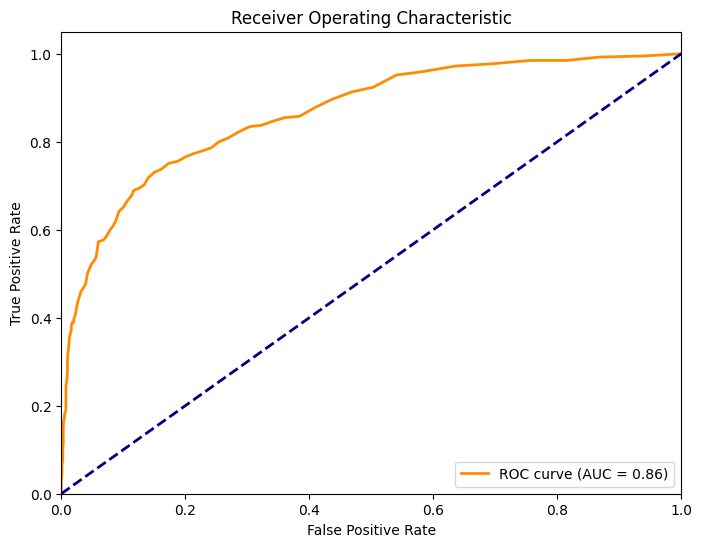

In [ ]:
# Train a binary classification model (Random Forest as an example)
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Get predicted probabilities for the positive class (class 1)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_prob)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

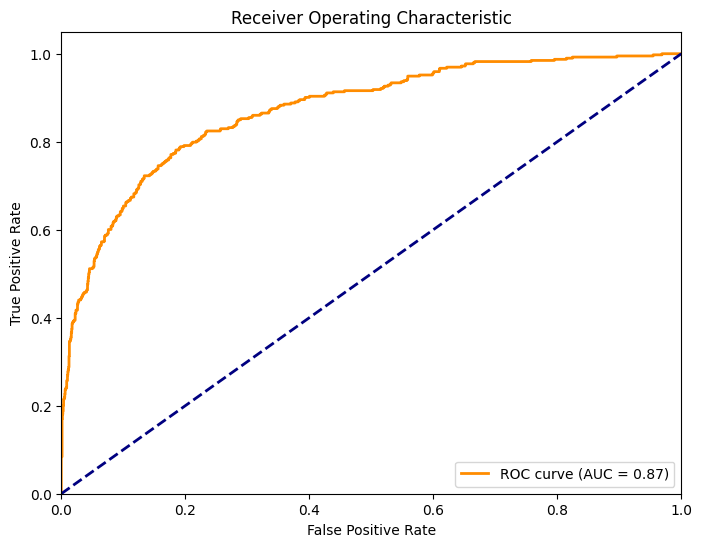

Accuracy: 0.8645
Confusion Matrix:
 [[1537   70]
 [ 201  192]]
Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.73      0.49      0.59       393

    accuracy                           0.86      2000
   macro avg       0.81      0.72      0.75      2000
weighted avg       0.85      0.86      0.85      2000



In [ ]:
# Train the XGBoost model on the training data
xgb_classifier = xgb.XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

gb_model = xgb_classifier.fit(X_train_scaled, y_train)

y_prob2 = gb_model.predict_proba(X_test_scaled)[:, 1]

auc = roc_auc_score(y_test, y_prob2)

fpr, tpr, thresholds = roc_curve(y_test, y_prob2)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

y_pred2 = gb_model.predict(X_test_scaled)
print("Accuracy:", accuracy_score(y_test, y_pred2))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred2))
print("Classification Report:\n", classification_report(y_test, y_pred2))